In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

rcParams["figure.figsize"] = (10, 6)
sns.set()

In [2]:
main_data = pd.read_csv("FuelConsumptionCo2.csv")

In [3]:
main_data.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
264,2014,CHEVROLET,SUBURBAN 4WD,SUV - STANDARD,5.3,8,A6,E,21.5,14.6,18.4,15,294
437,2014,GMC,SAVANA 1500 CARGO AWD,VAN - CARGO,5.3,8,A4,X,18.3,14.2,16.5,17,380
720,2014,MAZDA,MX-5,TWO-SEATER,2.0,4,M6,Z,11.1,8.4,9.9,29,228
241,2014,CHEVROLET,SILVERADO,PICKUP TRUCK - STANDARD,6.2,8,A6,Z,16.3,11.4,14.1,20,324
1008,2014,TOYOTA,VENZA,SUV - SMALL,2.7,4,AS6,X,11.4,8.2,10.0,28,230


### Step 1

In [4]:
# Here i drop a categorical and variable and see there are any linear relation between dependent variable and undependent variable 
correlation = main_data.drop(columns = ["MODELYEAR","MAKE", "FUELTYPE","MODEL", "VEHICLECLASS", "TRANSMISSION"]).corr()

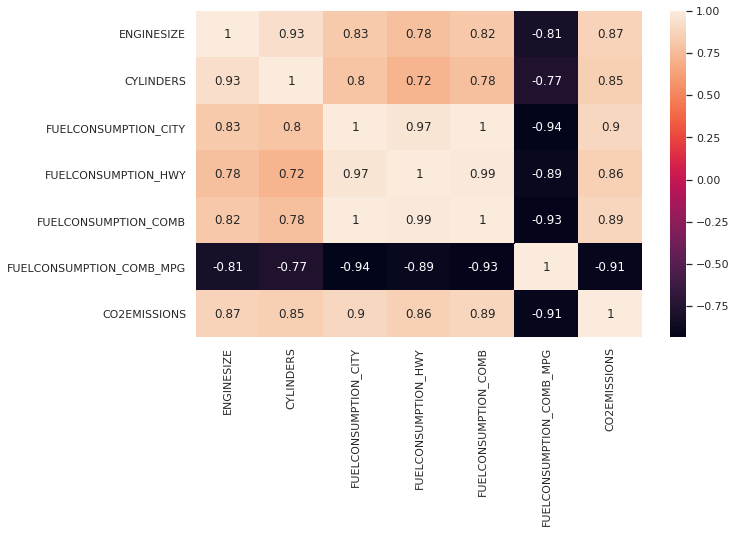

In [5]:
# let's plot our correlation

sns.heatmap(correlation, annot = True)
plt.show()

##### Observation:  Here Co2 Emission is our dependent variable
- Here FUELCONSUMPTION_CITY, FUELCONSUMPTION_COMB and FUELCONSUMPTION_HWY are heighly related to our dependent variable so they are most important feature and 
- ENGINESIZE and CYLINDERS are also important features

### Step 2

#### So let's plot a highly corelated variable with our dependent variable

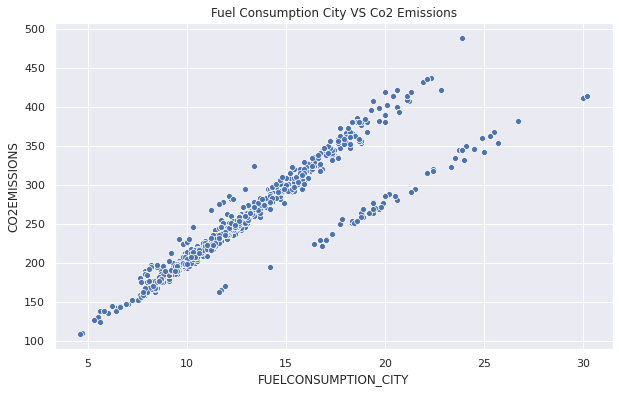

In [6]:
# Here I have a three Highly Correlated variable which are FUELCONSUMPTION_CITY, FUELCONSUMPTION_COMB, FUELCONSUMPTION_HWY, ENGINESIZE and CYLINDERS

# Let's take FUELCONSUMPTION_CITY vs Co2EMISSIONS

sns.scatterplot(main_data.FUELCONSUMPTION_CITY, main_data.CO2EMISSIONS)
plt.title("Fuel Consumption City VS Co2 Emissions")
plt.show()

###### Observation: here we can see when FUELCONSUMPTION_CITY is increase CO2EMISSIONS will be increase. Here Co2 Emissions is linearly increase so we can say here it's a linear relation ship

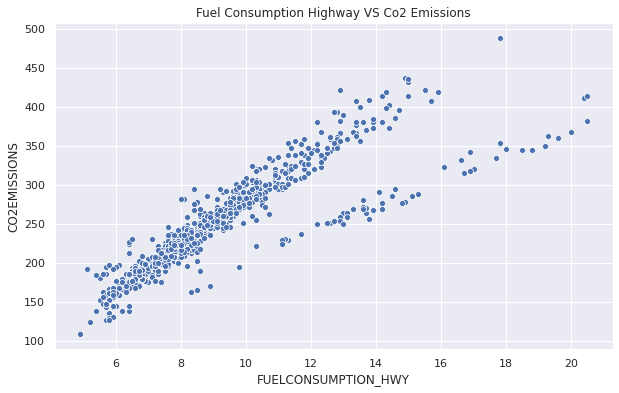

In [7]:
# Let's look at FUELCONSUMPTION_HWY vs CO2EMISSIONS

sns.scatterplot(main_data.FUELCONSUMPTION_HWY, main_data.CO2EMISSIONS)
plt.title("Fuel Consumption Highway VS Co2 Emissions")
plt.show()

###### Observation: here we can see when FUELCONSUMPTION_HWY is increase CO2EMISSIONS will be increase. Here Co2 Emissions is linearly increase so we can say here it's a linear relation ship

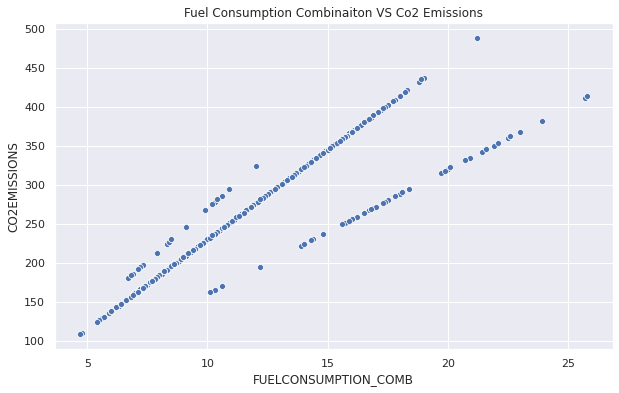

In [8]:
# Let's look at FUELCONSUMPTION_COMB vs CO2EMISSIONS

sns.scatterplot(main_data.FUELCONSUMPTION_COMB, main_data.CO2EMISSIONS)
plt.title("Fuel Consumption Combinaiton VS Co2 Emissions")
plt.show()

###### Observation: here we can see when FUELCONSUMPTION_COMB is increase CO2EMISSIONS will be increase. Here Co2 Emissions is linearly increase so we can say here it's a linear relation ship

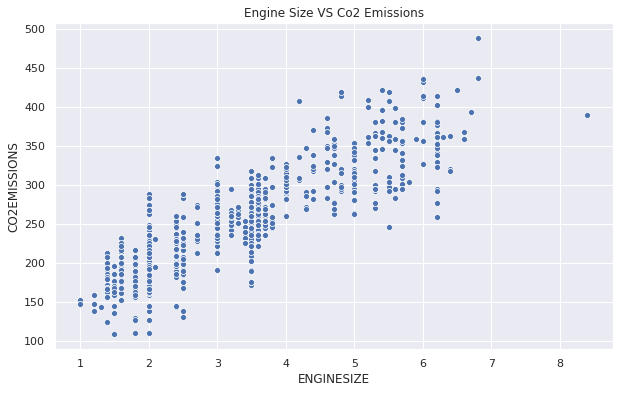

In [9]:
# let's look at ENGINESIZE vs CO2EMISSIONS

sns.scatterplot(main_data.ENGINESIZE, main_data.CO2EMISSIONS)
plt.title("Engine Size VS Co2 Emissions")
plt.show()

###### Observation: here we can see when ENGINESIZE is increase CO2EMISSIONS will be increase.

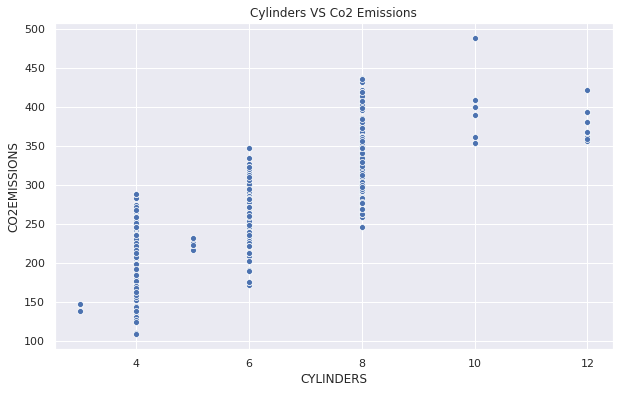

In [10]:
# Let's look at ENGINESIZE vs CYLINDERS

sns.scatterplot(main_data.CYLINDERS, main_data.CO2EMISSIONS)
plt.title("Cylinders VS Co2 Emissions")
plt.show()

###### observation: here we can see when CYLINDERS is increase CO2EMISSIONS will be increase.

### Step 3

In [11]:
# Here i'm going to pick a FUELCONSUMPTION_CITY to construct a linear regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(main_data[["FUELCONSUMPTION_CITY"]], main_data.CO2EMISSIONS.values)

LinearRegression()

In [12]:
predicted_values = model.predict(main_data[["FUELCONSUMPTION_CITY"]])

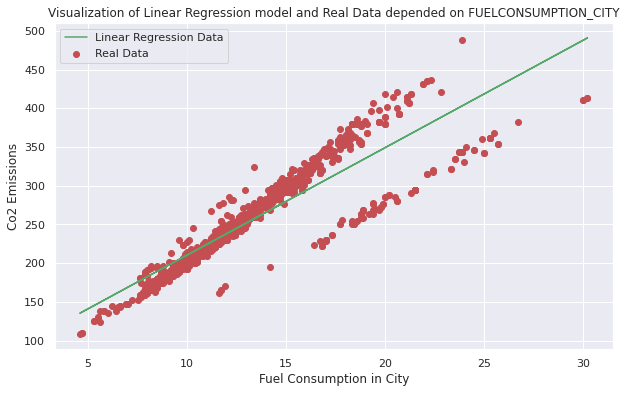

In [13]:
# Let's plot scatter plot and linear regression line

plt.scatter(main_data.FUELCONSUMPTION_CITY, main_data.CO2EMISSIONS, color = "r", label = "Real Data")
plt.plot(main_data.FUELCONSUMPTION_CITY, predicted_values, color = "g", label = "Linear Regression Data")
plt.xlabel("Fuel Consumption in City")
plt.ylabel("Co2 Emissions")
plt.title("Visualization of Linear Regression model and Real Data depended on FUELCONSUMPTION_CITY")
plt.legend()
plt.show()

##### Observation: Here we can see that as Fuel Consumption of City is increasing Co2 Emission will be increase so that's why Linear Regression on FUELCONSUMPTION_CITY  work almost good it give us around 80% accurate result

### Step 4

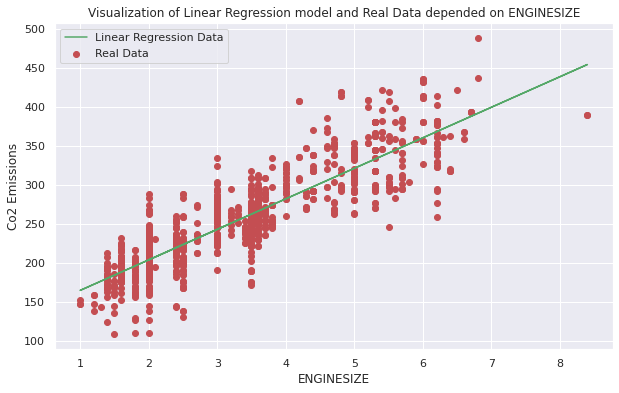

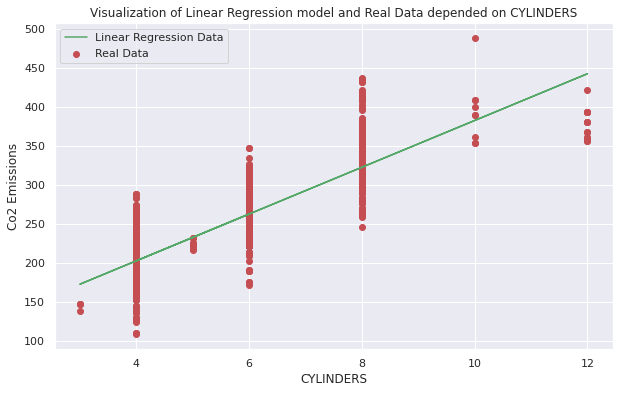

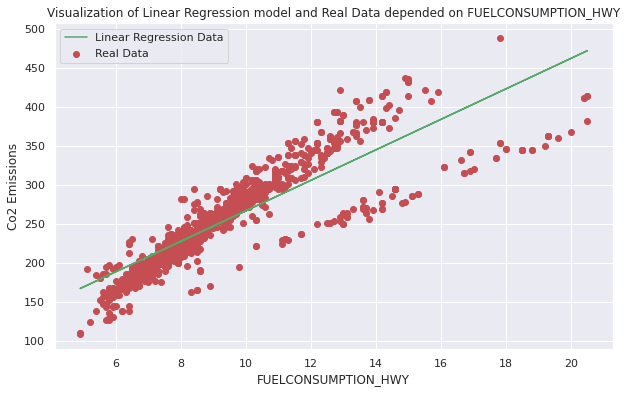

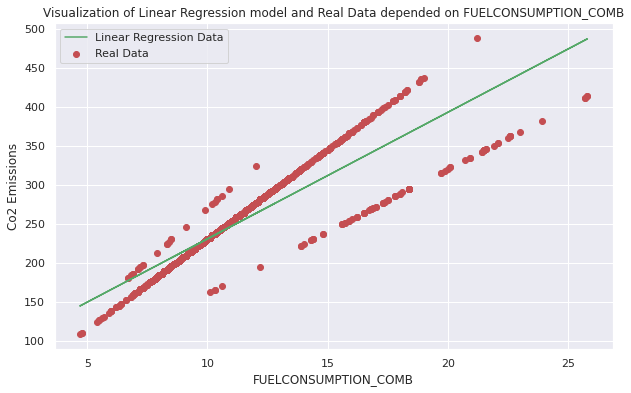

In [14]:
# Let's try regression to other variables


other_variables = ["ENGINESIZE","CYLINDERS", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB"]
for c in other_variables:        
    model.fit(main_data[[c]], main_data.CO2EMISSIONS.values)
    predicted_values = model.predict(main_data[[c]])    
    plt.scatter(main_data[c], main_data.CO2EMISSIONS, color = "r", label = "Real Data")
    plt.plot(main_data[c], predicted_values, color = "g", label = "Linear Regression Data")
    plt.xlabel(c)
    plt.ylabel("Co2 Emissions")
    plt.title("Visualization of Linear Regression model and Real Data depended on " + c)
    plt.legend()
    plt.show()

### Observation of Stage 3:
- Here first i found correlation between target and feature variables (numeric variables) and as a result i found that Fuel Consumption is high co relate with Co2 Emission so as Fuel Consumption increasing the Co2 Emission will be increase
- Then I have ploted all the highly corelated features with target variable and conclution is here it has a linear relationship as feature value increasing the Co2 Emission will be increase
- Then I have constrcuted Linear Regression Machine Learning model using one highly corelate variable which is FUELCONSUMPTION_CITY. I train that model and predict value and i have visualize that model with actual value and predicted value
- Then I train model again for other highly corelated feature and predict value and i have visualize that feaures with actual value and predicted value which was predicted by model using that particular features